<a href="https://colab.research.google.com/github/arjunmann73/Algorithms-Project/blob/lab3/Present.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the required libraries

In [0]:
import random
import pandas as pd
import pylab as pl
import numpy as np
import time
import math
import matplotlib.pyplot as plt
from statistics import mean 

## Defining algorithms:

### 1. Insertion Sort

In [0]:
def insertion_sort(collection, start, end):
    count = 0
    for loop_index in range(start, end+1):
        insertion_index = loop_index
        while insertion_index > 0 and collection[insertion_index - 1] > collection[insertion_index]:
            collection[insertion_index], collection[insertion_index - 1] = collection[insertion_index - 1], collection[insertion_index]
            insertion_index -= 1
            count += 1
    return count

### 2. Merge Sort

In [0]:
def MergeSort(ar, start, end):
  if(start<end):
    mid = (start+end)/2
    mid = int(mid)
    l = MergeSort(ar, start, mid)
    r = MergeSort(ar, mid+1, end)
    return Merge(ar, start, mid, end) + l + r
  return 0

def Merge(ar, start, mid, end):
  p = start
  q = mid+1
  count = 0
  temp = []
  for i in range(0,end-start+1):
    if p>mid :
      temp.append(ar[q])
      q += 1
    elif q>end :
      temp.append(ar[p])
      p += 1
    elif ar[p] > ar[q]:
      temp.append(ar[q])
      count += 1
      q += 1
    else:
      temp.append(ar[p])
      count += 1
      p += 1
  i = 0
  for q in range(start, end+1):
    ar[q] = temp[i]
    i += 1
  return count
  

### 3. Merge Sort integrated with Insertion Sort

In [0]:
def Merge_insert_Sort(ar, start, end, S):
  if(end-start > S):
    mid = (start+end)/2
    mid = int(mid)
    l = Merge_insert_Sort(ar, start, mid, S)
    r = Merge_insert_Sort(ar, mid+1, end, S)
    return l + r + Merge(ar, start, mid, end)
  else:
    return insertion_sort(ar, start, end)

## Generating numbers to be fed to the algorithms

In [0]:
numbers = []
for i in range(1000000):
    numbers.append(random.randint(0,1000))

## Finding size 'S' for which Insertion Sort is better than Merge Sort

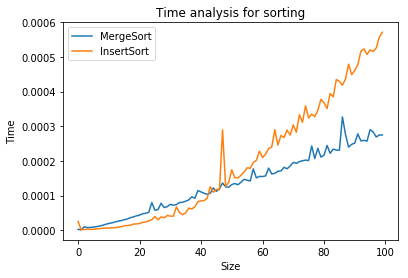

In [61]:
merge_values = []
insert_values = []
points = []

for z in range(100):
    yeet = []
    huha = []
    k = z
    for i in range(k):
        x = numbers[i]
        yeet.append(x)
        huha.append(x)
    #print("Size: ", k)
    start_time = time.time()
    a = MergeSort(yeet, 0, len(yeet) - 1)
    time_taken_1 = time.time() - start_time
    #print(yeet)
    #print("Time taken for merge sort = ", time_taken_1*1000)

    start_time = time.time()
    b = insertion_sort(huha, 1, len(huha)-1)
    time_taken_2 = time.time() - start_time
    #print(huha)
    #print("Time taken in insertion sort = ", time_taken_2*1000)
    merge_values.append(time_taken_1)
    insert_values.append(time_taken_2)
    points.append(k)
    #if(time_taken_1<time_taken_2):
    #    print("Maximum size of array for which insertion sort is faster: ", z-1)
    #    break
    #size = size*10

plt.plot(points, merge_values, label = "MergeSort")
plt.plot(points, insert_values, label = "InsertSort")
plt.xlabel("Size")
plt.ylabel("Time")
plt.title("Time analysis for sorting")
plt.legend()
plt.show()

## Choosing 5 values of 'S' to run the integrated algorithm

In [62]:
anomalies = []
attempts = 5
for i in range(len(merge_values)):
  if(merge_values[i]<insert_values[i]):
    #print(points[i])
    if points[i] == 1 or points[i] == 0:
      continue
    attempts -= 1
    anomalies.append(points[i])
  if(attempts==0):
    break
print(anomalies)

[43, 45, 47, 48, 49]


## Running Merge Sort and Integrated Sort with different input sizes

### 1. Size = 1000

Let us look at how time ranges with different 'S' values:


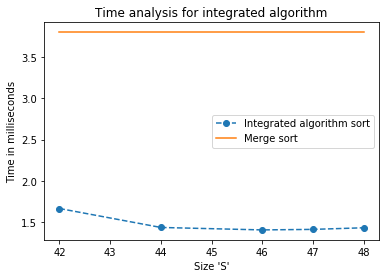

[2508, 2508, 2508, 2508, 2508]
[5044, 5044, 5044, 5044, 5044]


In [63]:
temp = 1000
#print("SIZE ", temp)
xa = []
ya = []
#x = []
compare_normal = []
compare_inte = []
y = []
for i in range(len(anomalies)):
  A = []
  B = []
  for j in range(temp):
    A.append(numbers[i])
    B.append(numbers[i])
    
    
  start_time = time.time()
  a = Merge_insert_Sort(A, 0, len(A) - 1, anomalies[i]-1)
  compare_normal.append(a)
  time_taken_1 = time.time() - start_time
  xa.append(anomalies[i]-1)
  ya.append(time_taken_1*1000)


  start_time = time.time()
  b = MergeSort(B, 0, len(B)-1)
  compare_inte.append(b)
  time_taken_2 = time.time() - start_time
  y.append(time_taken_2*1000)

print("Let us look at how time ranges with different 'S' values:")
avg = round(mean(y),2)
y = []
for i in range(5):
  y.append(avg)
#plt.subplot(1, 2, 1) 
plt.plot(xa, ya,linestyle='--', marker='o', label = "Integrated algorithm sort")
plt.plot(xa, y, label = "Merge sort")
plt.xlabel("Size 'S'")
plt.ylabel("Time in milliseconds")
plt.title("Time analysis for integrated algorithm")
plt.legend()
plt.show()

print(compare_normal)
print(compare_inte)

### 2. Size = 10000

Let us look at how time ranges with different 'S' values:


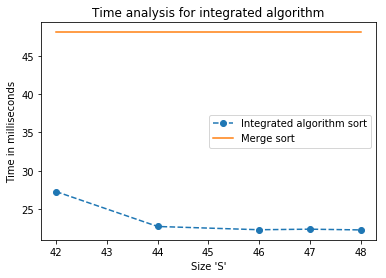

[40032, 40032, 40032, 40032, 40032]
[69008, 69008, 69008, 69008, 69008]


In [64]:
temp = 10000
#print("SIZE ", temp)
xa = []
ya = []
#x = []
compare_normal = []
compare_inte = []
y = []
for i in range(len(anomalies)):
  A = []
  B = []
  for j in range(temp):
    A.append(numbers[i])
    B.append(numbers[i])
    
    
  start_time = time.time()
  a = Merge_insert_Sort(A, 0, len(A) - 1, anomalies[i]-1)
  compare_normal.append(a)
  time_taken_1 = time.time() - start_time
  xa.append(anomalies[i]-1)
  ya.append(time_taken_1*1000)


  start_time = time.time()
  b = MergeSort(B, 0, len(B)-1)
  compare_inte.append(b)
  time_taken_2 = time.time() - start_time
  y.append(time_taken_2*1000)

print("Let us look at how time ranges with different 'S' values:")
avg = round(mean(y),2)
y = []
for i in range(5):
  y.append(avg)
#plt.subplot(1, 2, 1) 
plt.plot(xa, ya,linestyle='--', marker='o', label = "Integrated algorithm sort")
plt.plot(xa, y, label = "Merge sort")
plt.xlabel("Size 'S'")
plt.ylabel("Time in milliseconds")
plt.title("Time analysis for integrated algorithm")
plt.legend()
plt.show()

print(compare_normal)
print(compare_inte)

### 3. Size = 100000

Let us look at how time ranges with different 'S' values:


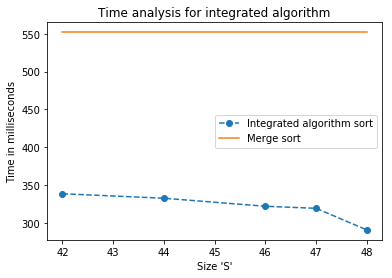

[601360, 601360, 601360, 592912, 550512]
[853904, 853904, 853904, 853904, 853904]


In [65]:
temp = 100000
#print("SIZE ", temp)
xa = []
ya = []
#x = []
compare_normal = []
compare_inte = []
y = []
for i in range(len(anomalies)):
  A = []
  B = []
  for j in range(temp):
    A.append(numbers[i])
    B.append(numbers[i])
    
    
  start_time = time.time()
  a = Merge_insert_Sort(A, 0, len(A) - 1, anomalies[i]-1)
  compare_normal.append(a)
  time_taken_1 = time.time() - start_time
  xa.append(anomalies[i]-1)
  ya.append(time_taken_1*1000)


  start_time = time.time()
  b = MergeSort(B, 0, len(B)-1)
  compare_inte.append(b)
  time_taken_2 = time.time() - start_time
  y.append(time_taken_2*1000)

print("Let us look at how time ranges with different 'S' values:")
avg = round(mean(y),2)
y = []
for i in range(5):
  y.append(avg)
#plt.subplot(1, 2, 1) 
plt.plot(xa, ya,linestyle='--', marker='o', label = "Integrated algorithm sort")
plt.plot(xa, y, label = "Merge sort")
plt.xlabel("Size 'S'")
plt.ylabel("Time in milliseconds")
plt.title("Time analysis for integrated algorithm")
plt.legend()
plt.show()

print(compare_normal)
print(compare_inte)

### 4. Size = 1000000


Let us look at how time ranges with different 'S' values:


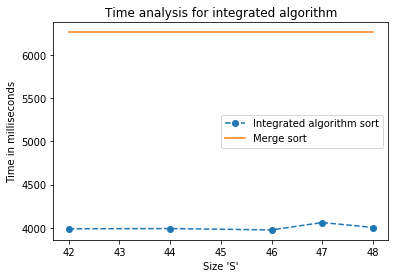

[7509376, 7509376, 7509376, 7509376, 7509376]
[10066432, 10066432, 10066432, 10066432, 10066432]


In [66]:
temp = 1000000
#print("SIZE ", temp)
xa = []
ya = []
#x = []
compare_normal = []
compare_inte = []
y = []
for i in range(len(anomalies)):
  A = []
  B = []
  for j in range(temp):
    A.append(numbers[i])
    B.append(numbers[i])
    
    
  start_time = time.time()
  a = Merge_insert_Sort(A, 0, len(A) - 1, anomalies[i]-1)
  compare_normal.append(a)
  time_taken_1 = time.time() - start_time
  xa.append(anomalies[i]-1)
  ya.append(time_taken_1*1000)


  start_time = time.time()
  b = MergeSort(B, 0, len(B)-1)
  compare_inte.append(b)
  time_taken_2 = time.time() - start_time
  y.append(time_taken_2*1000)

print("Let us look at how time ranges with different 'S' values:")
avg = round(mean(y),2)
y = []
for i in range(5):
  y.append(avg)
#plt.subplot(1, 2, 1) 
plt.plot(xa, ya,linestyle='--', marker='o', label = "Integrated algorithm sort")
plt.plot(xa, y, label = "Merge sort")
plt.xlabel("Size 'S'")
plt.ylabel("Time in milliseconds")
plt.title("Time analysis for integrated algorithm")
plt.legend()
plt.show()

print(compare_normal)
print(compare_inte)

In [0]:
x = [1000]